In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# RIP-qPCR of BCL-2 and MALAT1 (Figure 5b,c)

Gene: BCL-2
p-value: 0.002135503856373248


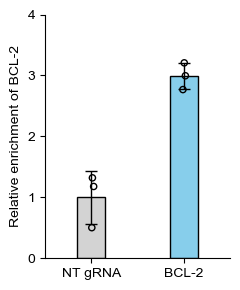

Gene: MALAT1
p-value: 0.03526907885637893


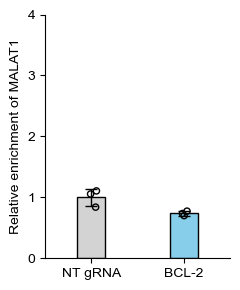

In [10]:
np.random.seed(0)

dats = pd.read_excel("data/JA1_sg-BCL2_RIP-qPCR.xlsx", sheet_name=None, index_col=0)
dat1 = dats['Relative enrichment of BCL-2']
dat2 = dats['Relative enrichment of MALAT1']
w = 0.3
colors = ["lightgrey", "skyblue"]

for i, dat in enumerate([dat1, dat2]):
    gene = ["BCL-2", "MALAT1"][i]
    print("Gene:", gene)
    means = dat.mean(axis=1)
    stds = dat.std(axis=1)
    xs = np.arange(len(means))
    # ylim = [4, 2][i]
    ylim = 4
    plt.figure(figsize=(2.5, 3))
    plt.bar(xs, means, yerr=stds, error_kw=dict(capsize=4, lw=1), width=w, edgecolor="black", color=colors)
    
    if True:
        w1 = w * 0.4
        for j in np.arange(len(dat)):
            xs1 = j + (np.random.rand(len(dat.columns)) - 0.5) * w1
            ys1 = dat.values[j]
            plt.scatter(xs1, ys1, s=20, zorder=10, edgecolor="black", color="none")
            

    for j in range(1, 2):
        vs1 = dat.values[0]
        vs2 = dat.values[j]
        pval = ttest_ind(vs1, vs2)[1]
        print("p-value:", pval)

    
    plt.xticks(xs, dat.index)
    plt.ylabel("Relative enrichment of %s" % gene)
    plt.xlim(-0.5, 1.5)
    plt.ylim(0, ylim)
    plt.yticks([0, 1, 2, 3, 4])
    for loc in ["top", "right"]:
        plt.gca().spines[loc].set_visible(False)
    plt.tight_layout()
    plt.savefig("figures/JA1_sg-BCL2_RIP-qPCR.%s.pdf" % gene)
    plt.show()
    plt.close()

# RIP–qPCR of BCL2 in vivo (Figure 5f)

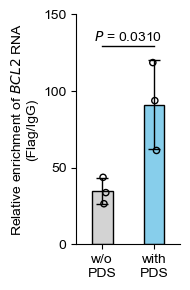

In [3]:
dat = pd.read_excel("data/RIP_qPCR_230303.xlsx", index_col=0)
w = 0.4
np.random.seed(0)

for i in range(5):
    
    d1 = dat.iloc[[i * 2, i * 2 + 1]]
    pval = ttest_ind(d1.iloc[0], d1.iloc[1])[1]
    ys1 = d1.mean(axis=1)
    yerr1 = d1.std(axis=1)
    xs = np.arange(len(ys1))
    gname = list(d1.index)[0].strip()
    if gname != "RBM12":
        continue
    # print(gname, pval, sep="\t")
    xticks = ["w/o\nPDS", "with\nPDS"]

    plt.figure(figsize=(2, 3))
    # plt.title("%s" % gname)
    plt.bar(xs, ys1, yerr=yerr1, width=w, edgecolor="black", color=["lightgrey", "skyblue"], error_kw={"capsize": 4, "lw": 1})
    
    ymax = max(ys1 + yerr1) * 1.2
    if pval <= 1:
        plt.plot([0, 1], [ymax * 0.9, ymax * 0.9], lw=1, color="black")
        plt.text(0.5, ymax * 0.91, "$\it{P}$ = %.4f" % pval, va="bottom", ha="center")
    
    if True:
        for j in range(2):
            for y in d1.iloc[j]:
                w1 = w * 0.8
                x = j - w1 / 2 + np.random.rand() * w1
                plt.scatter(x, y, zorder=10, marker="o", s=20, color="none", edgecolor="black")
        
    plt.xticks(xs, xticks, rotation=0)
    plt.xlim(-0.5, 1.5)
    # plt.ylim(0, ymax)
    plt.ylim(0, 150)
    plt.yticks(np.arange(0, 150 + 1, 50))
    plt.ylabel("Relative enrichment of $\it{BCL2}$ RNA\n(Flag/IgG)")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout()
    # plt.show()
    plt.savefig("figures/RIP_qPCR_230303.%s.pdf" % gname, dpi=300)
    plt.show()
    plt.close()

# Relative mRNA levels were quantified using RT-qPCR (Extended Data Figure 7k)

In [7]:
dats = pd.read_excel("data/dual-luciferase-RNA_2024-01-07.xlsx", sheet_name=None)
dat = dats["Sheet2"]
dat.index = dat["Expression of Firefly luciferase (normalized to Renilla luciferase)"]
dat = dat[["Rep 1", "Rep 2", "Rep 3"]]
dat

,Rep 1,Rep 2,Rep 3
Expression of Firefly luciferase (normalized to Renilla luciferase),,,
WT_RBM12,1.220825,1.477191,1.402360
WT_Vec,0.971211,0.995061,1.033728
Mut_RBM12,1.114721,1.406084,1.367635
Mut_Vec,0.937365,0.967064,1.095571


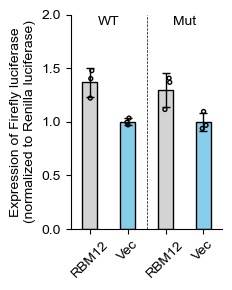

In [10]:
w = 0.4
np.random.seed(0)

ys = dat.mean(axis=1)
yerr = dat.std(axis=1)
xs = np.arange(len(ys))
colors = ["lightgrey", "skyblue", "lightgrey", "skyblue"]
ticks = ["RBM12", "Vec", "RBM12", "Vec"]

plt.figure(figsize=(2.5, 3))
plt.bar(xs, ys, yerr=yerr, edgecolor="black", width=w, color=colors, capsize=3, error_kw={"lw": 1})
ymax = 2
plt.ylim(0, ymax)

w1 = w * 0.6
for x in range(len(dat)):
    for y in dat.iloc[x]:
        x1 = x + (np.random.rand() - 0.5) * w1
        plt.scatter(x1, y, marker="o", s=8, color="none", edgecolor="black", lw=1, zorder=10)

plt.axvline(1.5, ls="--", lw=0.5, color="black")
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.xticks(xs, ticks, rotation=45)
plt.text(0.5, ymax * 0.95, "WT", size=10, ha="center")
plt.text(2.5, ymax * 0.95, "Mut", size=10, color="black", ha="center")
plt.ylabel("Expression of Firefly luciferase\n(normalized to Renilla luciferase)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/dual-luciferase-RNA_2024-01-07.pdf", dpi=300)
plt.show()
plt.close()